## Reproducing Figure 7.9 in PRML

Import modules.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

np.random.seed(20160508)

Generate a training set.

In [2]:
def create_dataset(num):
    x = np.linspace(0,1,num)
    y = np.sin(2*np.pi*x) + normal(scale=0.2, size=num)
    return DataFrame({'x':x, 'y':y})

N=10           # サンプルを取得する位置 x の個数
train_set = create_dataset(N)
t= np.array(train_set['y'])

Prepare bases (kernel) functions. A bias term is omitted for simplicity.

In [3]:
def kern(x_n,x_m):
    return np.exp(-0.05*(x_n-x_m)*(x_n-x_m))

phi = np.array([[kern(x1, x2) for x2 in np.linspace(0,1,N)] for x1 in np.linspace(0,1,N)])

Define initinal values for hyperparameters.

In [4]:
beta = 1.0
alphas = np.array([0.1]*N)

Optimize hyperparameters using the iterative method.

In [5]:
for loop in range(10000):
    a = np.diag(alphas)
    sigma = np.linalg.inv(a + beta*np.dot(phi.T,phi))
    m = beta * np.dot(np.dot(sigma, phi.T), t)
    gamma = np.array([1-alphas[i]*sigma[i][i] for i in range(N)])
    alphas_old, beta_old = alphas, beta
    alphas = np.array([gamma[i]/(m[i]*m[i]) for i in range(N)])
    for i in range(N):
        if alphas[i] <= 0:
            alphas[i] = 10**(-50)
    tmp = t-np.dot(phi,m.T)
    beta = (N-np.sum(gamma))/np.dot(tmp,tmp.T)

1/np.sqrt(beta),alphas

(0.21357722677957236,
 array([  8.14353747e-12,   2.76296220e+00,   2.45557318e-04,
          2.30210904e-06,   4.71930294e-13,   4.42234292e+03,
          1.25837032e+02,   2.29129060e-13,   6.06386569e-07,
          1.03296584e-12]))

Draw a graph of the means of the estimation.

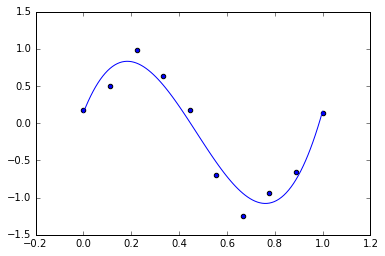

In [6]:
def mean(x, alphas):    
    a = np.diag(alphas)
    sigma = np.linalg.inv(a + beta*np.dot(phi.T,phi))
    m = beta * np.dot(np.dot(sigma, phi.T), t.T)
    p = np.array([kern(x, x2) for x2 in np.linspace(0,1,N)])
    return np.dot(m, p)

fig = plt.figure()
linex = np.linspace(0,1,100)
liney = mean(linex, alphas)
subplot = fig.add_subplot(1,1,1)
subplot.plot(linex,liney)
subplot.scatter(train_set['x'],train_set['y'])

Check the values of alphas with the descending order.

In [7]:
np.sort(alphas)

array([  2.29129060e-13,   4.71930294e-13,   1.03296584e-12,
         8.14353747e-12,   6.06386569e-07,   2.30210904e-06,
         2.45557318e-04,   2.76296220e+00,   1.25837032e+02,
         4.42234292e+03])

Draw graphs with increasing the relevant bases in the order of alphas.

The large red circle indicates the data points corresponding to the relevant bases.

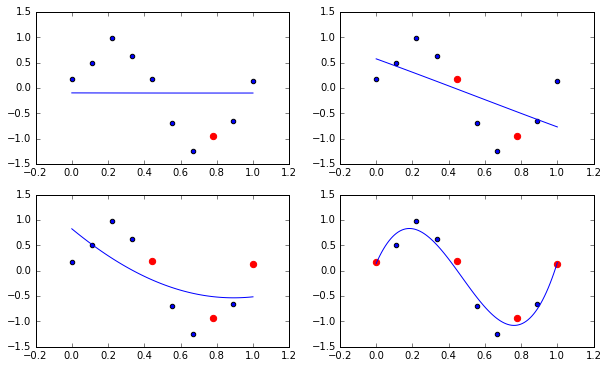

In [8]:
fig = plt.figure(figsize=(10,6))
linex = np.linspace(0,1,100)

for r in range(1,5):
    alphas2 = np.copy(alphas)
    cutoff = np.sort(alphas2)[r-1]
    for i in range(N):
        if alphas2[i] > cutoff:
            alphas2[i] = 10.0**100
            
    subplot = fig.add_subplot(2,2,r)
    liney = mean(linex, alphas2)
    subplot.plot(linex,liney)
    subplot.scatter(train_set['x'],train_set['y'])
    train_set['alphas']=alphas
    rel_set = train_set[train_set['alphas'] <= np.sort(train_set['alphas'])[r-1]]
    subplot.scatter(rel_set['x'],rel_set['y'],s=40,color='red')